<a href="https://colab.research.google.com/github/santosh2994/AAIC/blob/master/mnist_single_digit_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [4]:
mnist = keras.datasets.mnist

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [10]:
len(train_images)

60000

In [11]:
len(test_images)

10000

In [12]:
len(test_labels)

10000

In [13]:
len(train_labels)

60000

In [0]:
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']

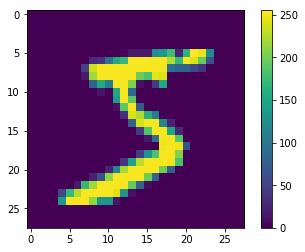

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

In [16]:
train_labels[0]

5

In [0]:
# we need to scale the values into a range of 0 and 1 so we will be dividing it by 255 which is the highesr color range

train_images = train_images / 255.0
test_images = test_images / 255.0

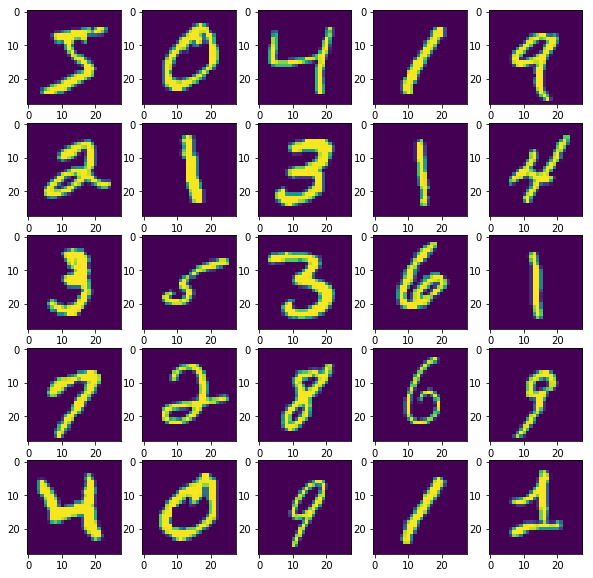

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.grid(False)

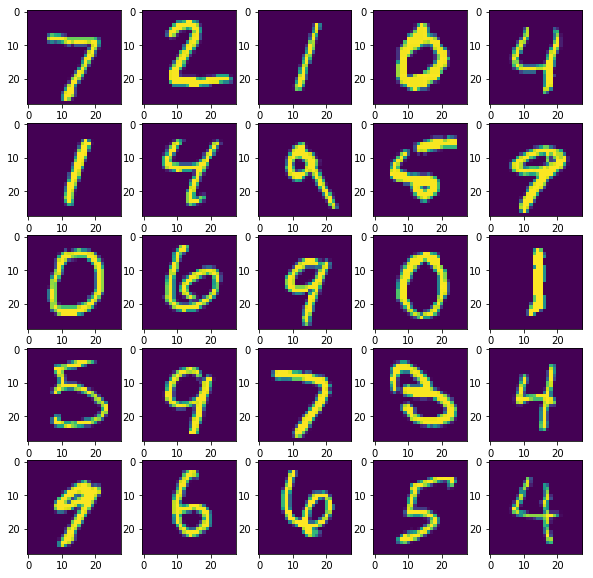

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(test_images[i])

### Build the Model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
                         ])

In [0]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [28]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2464 - acc: 0.9293
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2375 - acc: 0.9319
Epoch 3/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2291 - acc: 0.9337
Epoch 4/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2210 - acc: 0.9370
Epoch 5/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2130 - acc: 0.9392
Epoch 6/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2052 - acc: 0.9414
Epoch 7/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1973 - acc: 0.9445
Epoch 8/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1902 - acc: 0.9462
Epoch 9/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1829 - acc: 0.9485
Epoch 10/20
60000/60000 [==============================] - 4s 68us/sample - loss: 

### Evaluate the model

In [29]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 19.0690 - acc: 0.9384


In [31]:
print("Test Accuracy :",test_acc)
print("Test Loss : ",test_loss)

Test Accuracy : 0.9384
Test Loss :  19.069003757717585


### Now predict the model

In [0]:
predictions = model.predict(test_images)

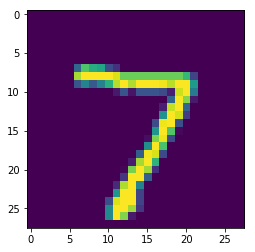

In [36]:
plt.imshow(test_images[0])

In [34]:
np.argmax(predictions[0])

7

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

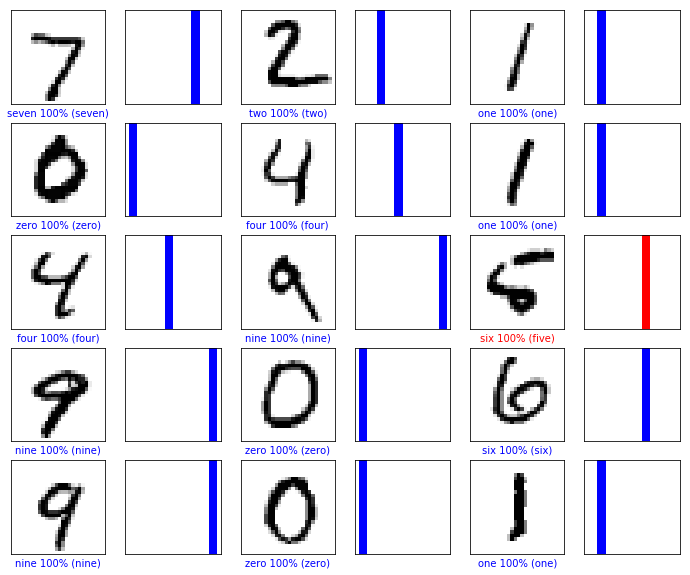

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()